In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import minmax_scale , normalize , scale
from sklearn import preprocessing
from sklearn import datasets
from sklearn.datasets import load_boston 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split , cross_val_score , RandomizedSearchCV , GridSearchCV
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_absolute_error ,roc_curve , roc_auc_score
from sklearn.linear_model import Lasso , Ridge
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint , pearsonr
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans , MeanShift , DBSCAN
from scipy.cluster.hierarchy import linkage , dendrogram, fcluster
from sklearn.decomposition import PCA

In [2]:
titanic=pd.read_csv('D://titanic.csv')

In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [4]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [5]:
titanic.drop(columns='deck', axis=1,inplace=True)

In [6]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
titanic.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
titanic.duplicated().sum()

111

In [9]:
titanic.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
titanic=pd.get_dummies(titanic)

In [11]:
titanic

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [12]:
titanic.drop('sex_female', axis=1, inplace=True)

In [13]:
titanic

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


In [14]:
titanic.rename({'sex_male':'male'},axis=1,inplace=True)

In [15]:
titanic

,survived,pclass,age,sibsp,parch,fare,male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


In [16]:
titanic['target']=titanic['male']

In [17]:
titanic.dropna(inplace=True)

In [18]:
titanic.drop('male',axis=1, inplace=True)

In [19]:
titanic

,survived,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,target
0,0,3,22.0,1,0,7.2500,0,0,1,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0,0
886,0,2,27.0,0,0,13.0000,0,0,1,1
887,1,1,19.0,0,0,30.0000,0,0,1,0
889,1,1,26.0,0,0,30.0000,1,0,0,1


In [20]:
cor=titanic.corr()

<AxesSubplot:>

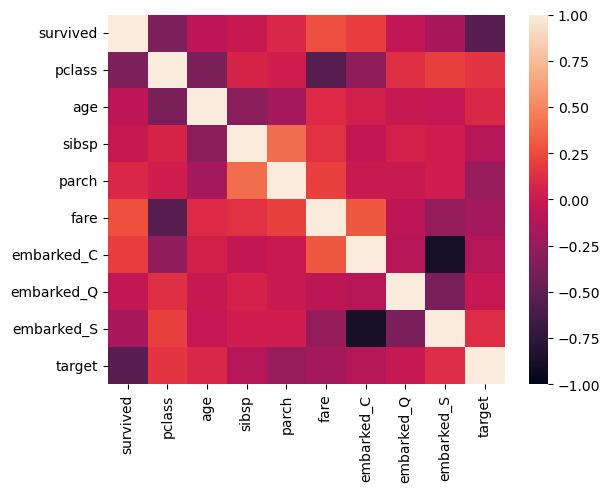

In [21]:
sb.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns , vmin=-1, vmax=1)

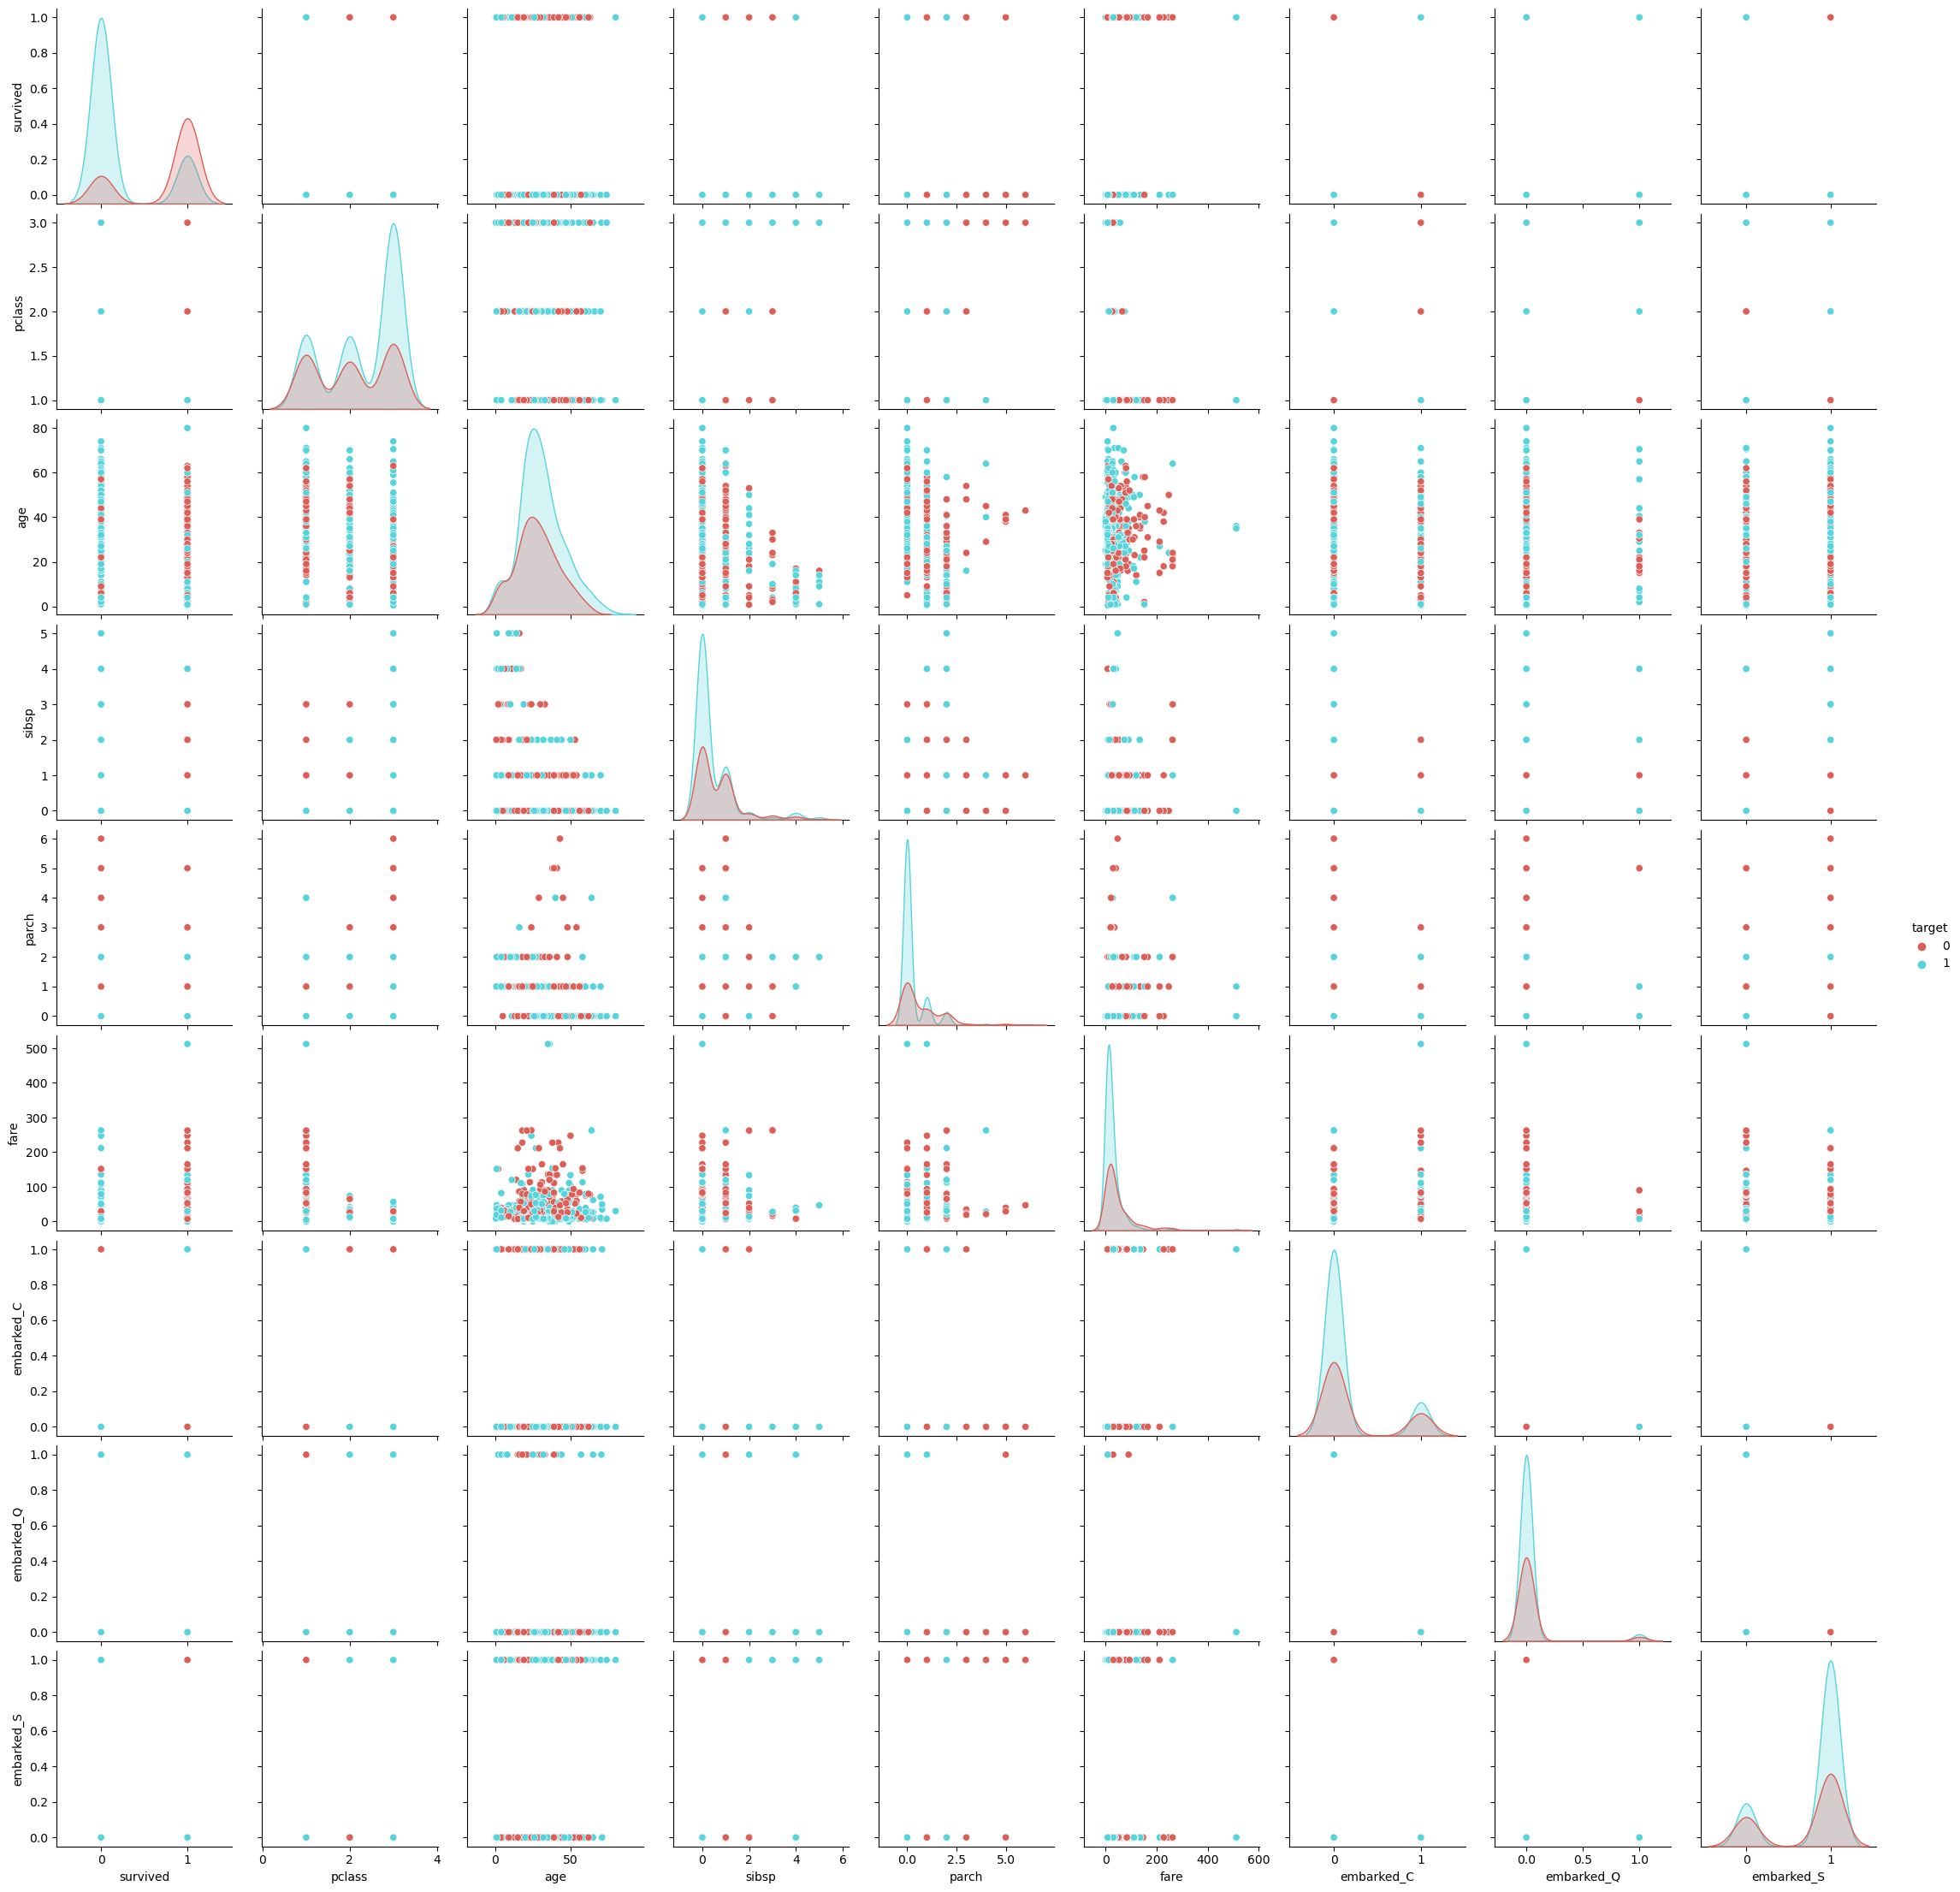

In [22]:
sb.pairplot(titanic, hue='target' , palette='hls')

In [23]:
titanic_scale=minmax_scale(titanic , feature_range=(-1,1),axis=1 )

In [24]:
titanic

,survived,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,target
0,0,3,22.0,1,0,7.2500,0,0,1,1
1,1,1,38.0,1,0,71.2833,1,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0,0
886,0,2,27.0,0,0,13.0000,0,0,1,1
887,1,1,19.0,0,0,30.0000,0,0,1,0
889,1,1,26.0,0,0,30.0000,1,0,0,1


In [25]:
titanic=pd.DataFrame(titanic_scale, columns=titanic.columns)

In [26]:
titanic

,survived,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,target
0,-1.000000,-0.727273,1.000000,-0.909091,-1.00000,-0.340909,-1.000000,-1.000000,-0.909091,-0.909091
1,-0.971943,-0.971943,0.066168,-0.971943,-1.00000,1.000000,-0.971943,-1.000000,-1.000000,-1.000000
2,-0.923077,-0.769231,1.000000,-1.000000,-1.00000,-0.390385,-1.000000,-1.000000,-0.923077,-1.000000
3,-0.962335,-0.962335,0.318267,-0.962335,-1.00000,1.000000,-1.000000,-1.000000,-0.962335,-1.000000
4,-1.000000,-0.828571,1.000000,-1.000000,-1.00000,-0.540000,-1.000000,-1.000000,-0.942857,-0.942857
...,...,...,...,...,...,...,...,...,...,...
709,-1.000000,-0.846154,1.000000,-1.000000,-0.74359,0.493590,-1.000000,-0.948718,-1.000000,-1.000000
710,-1.000000,-0.851852,1.000000,-1.000000,-1.00000,-0.037037,-1.000000,-1.000000,-0.925926,-0.925926
711,-0.933333,-0.933333,0.266667,-1.000000,-1.00000,1.000000,-1.000000,-1.000000,-0.933333,-1.000000
712,-0.933333,-0.933333,0.733333,-1.000000,-1.00000,1.000000,-0.933333,-1.000000,-1.000000,-0.933333


In [29]:
titanic.drop_duplicates(inplace=True)

In [30]:
titanict

,survived,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,target
0,-1.000000,-0.727273,1.000000,-0.909091,-1.00000,-0.340909,-1.000000,-1.000000,-0.909091,-0.909091
1,-0.971943,-0.971943,0.066168,-0.971943,-1.00000,1.000000,-0.971943,-1.000000,-1.000000,-1.000000
2,-0.923077,-0.769231,1.000000,-1.000000,-1.00000,-0.390385,-1.000000,-1.000000,-0.923077,-1.000000
3,-0.962335,-0.962335,0.318267,-0.962335,-1.00000,1.000000,-1.000000,-1.000000,-0.962335,-1.000000
4,-1.000000,-0.828571,1.000000,-1.000000,-1.00000,-0.540000,-1.000000,-1.000000,-0.942857,-0.942857
...,...,...,...,...,...,...,...,...,...,...
707,-1.000000,-0.857143,1.000000,-1.000000,-1.00000,-0.250000,-1.000000,-1.000000,-0.928571,-0.928571
709,-1.000000,-0.846154,1.000000,-1.000000,-0.74359,0.493590,-1.000000,-0.948718,-1.000000,-1.000000
711,-0.933333,-0.933333,0.266667,-1.000000,-1.00000,1.000000,-1.000000,-1.000000,-0.933333,-1.000000
712,-0.933333,-0.933333,0.733333,-1.000000,-1.00000,1.000000,-0.933333,-1.000000,-1.000000,-0.933333


In [60]:
titan=titanic.iloc[:,:-1]

In [61]:
titan.values

array([[-1.        , -0.72727273,  1.        , ..., -1.        ,
        -1.        , -0.90909091],
       [-0.97194294, -0.97194294,  0.06616837, ..., -0.97194294,
        -1.        , -1.        ],
       [-0.92307692, -0.76923077,  1.        , ..., -1.        ,
        -1.        , -0.92307692],
       ...,
       [-0.93333333, -0.93333333,  0.26666667, ..., -1.        ,
        -1.        , -0.93333333],
       [-0.93333333, -0.93333333,  0.73333333, ..., -0.93333333,
        -1.        , -1.        ],
       [-1.        , -0.8125    ,  1.        , ..., -1.        ,
        -0.9375    , -1.        ]])

In [62]:
titanic_value=np.array(titan.values)

In [63]:
titanic_value

array([[-1.        , -0.72727273,  1.        , ..., -1.        ,
        -1.        , -0.90909091],
       [-0.97194294, -0.97194294,  0.06616837, ..., -0.97194294,
        -1.        , -1.        ],
       [-0.92307692, -0.76923077,  1.        , ..., -1.        ,
        -1.        , -0.92307692],
       ...,
       [-0.93333333, -0.93333333,  0.26666667, ..., -1.        ,
        -1.        , -0.93333333],
       [-0.93333333, -0.93333333,  0.73333333, ..., -0.93333333,
        -1.        , -1.        ],
       [-1.        , -0.8125    ,  1.        , ..., -1.        ,
        -0.9375    , -1.        ]])

In [38]:
titanic_data=np.array(titanic['target'])

In [39]:
titanic_data

array([-0.90909091, -1.        , -1.        , -1.        , -0.94285714,
       -0.96296296, -0.90510083, -1.        , -1.        , -1.        ,
       -1.        , -0.9       , -0.94871795, -1.        , -1.        ,
       -0.93133047, -1.        , -0.94285714, -0.94117647, -1.        ,
       -0.94366197, -1.        , -1.        , -0.99239544, -0.95      ,
       -0.96969697, -0.97566045, -0.96153846, -0.9047619 , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -0.9496063 , -0.9047619 , -1.        , -1.        ,
       -0.96923077, -1.        , -0.92982456, -1.        , -0.95735608,
       -0.90909091, -1.        , -0.97604073, -0.92831541, -1.        ,
       -0.89473684, -1.        , -0.92307692, -0.9375    , -1.        ,
       -0.97278912, -0.92307692, -0.96459914, -0.92      , -0.93103448,
       -1.        , -0.90909091, -0.93103448, -0.95753715, -1.        ,
       -1.        , -0.94181818, -1.        , -0.91666667, -0.93

In [80]:
x_train,x_test,y_train,y_test=train_test_split(titanic_value, titanic_data, test_size=0.2 , shuffle=True)

In [81]:
ridge=Ridge(alpha=0.1, normalize=True)

In [82]:
ridge.fit(x_train,y_train)

C:\Users\mahnaz\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.1, normalize=True)

In [83]:
y_pred=ridge.predict(x_test)

In [84]:
ridge.score(x_test,y_test)

0.2948285979154702

In [108]:
dic_lasso={'alpha':np.linspace(0,1,10),'normalize':[True,False]}

In [109]:
lasso=Lasso()

In [114]:
lasso_cv=RandomizedSearchCV(lasso, dic_lasso, cv=5)

In [115]:
lasso_cv.fit(x_train,y_train)

C:\Users\mahnaz\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\mahnaz\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\mahnaz\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                        'normalize': [True, False]})

In [116]:
lasso_cv.best_params_

{'normalize': False, 'alpha': 0.0}

In [117]:
lasso_cv.best_score_

0.35576473968465